<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week36.do.txt --no_mako -->
<!-- dom:TITLE: Week 36: Linear Regression and Gradient descent -->

# Week 36: Linear Regression and Gradient descent
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo, Norway

Date: **September 1-5, 2025**

## Plans for week 36

**Material for the lecture on Monday September 1:**
1. Linear Regression, ordinary least squares (OLS), Ridge and Lasso and mathematical analysis

2. Derivation of Gradient descent and discussion of implementations for
<!-- * [Video of lecture](https://youtu.be/oHjqjUB36KE) -->
<!-- * [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesSeptember2.pdf) -->

**Material for the lab sessions on Tuesday and Wednesday (see at the end of these slides):**
1. Technicalities concerning Ridge and Lasso linear regression.

2. Presentation and discussion of the first project
<!-- * [Video of lab session](https://youtu.be/ZrIdZdZtHe0) -->

**Reading suggestion:**
1. Goodfellow et al, Deep Learning, introduction to gradient descent, see chapter 4.3 at <https://www.deeplearningbook.org/contents/numerical.html>

2. Rashcka et al, pages 37-44 and pages 278-283 with focus on linear regression.

## Material for lecture Monday September 2

## Mathematical Interpretation of Ordinary Least Squares

What is presented here is a mathematical analysis of various regression algorithms (ordinary least  squares, Ridge and Lasso Regression). The analysis is based on an important algorithm in linear algebra, the so-called Singular Value Decomposition (SVD). 

We have shown that in ordinary least squares the optimal parameters $\theta$ are given by

$$
\hat{\boldsymbol{\theta}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The **hat** over $\boldsymbol{\theta}$ means we have the optimal parameters after minimization of the cost function.

This means that our best model is defined as

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\theta}} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We now define a matrix

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T.
$$

We can rewrite

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\theta}} = \boldsymbol{A}\boldsymbol{y}.
$$

The matrix $\boldsymbol{A}$ has the important property that $\boldsymbol{A}^2=\boldsymbol{A}$. This is the definition of a projection matrix.
We can then interpret our optimal model $\tilde{\boldsymbol{y}}$ as being represented  by an orthogonal  projection of $\boldsymbol{y}$ onto a space defined by the column vectors of $\boldsymbol{X}$.  In our case here the matrix $\boldsymbol{A}$ is a square matrix. If it is a general rectangular matrix we have an oblique projection matrix.

## Residual Error

We have defined the residual error as

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=\left[\boldsymbol{I}-\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\right]\boldsymbol{y}.
$$

The residual errors are then the projections of $\boldsymbol{y}$ onto the orthogonal component of the space defined by the column vectors of $\boldsymbol{X}$.

## Simple case

If the matrix $\boldsymbol{X}$ is an orthogonal (or unitary in case of complex values) matrix, we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{X}\boldsymbol{X}^T = \boldsymbol{I}.
$$

In this case the matrix $\boldsymbol{A}$ becomes

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T)=\boldsymbol{I},
$$

and we have the obvious case

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=0.
$$

This serves also as a useful test of our codes.

## The singular value decomposition

The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion where we fit of various functions leads to
row vectors of the design matrix which are essentially orthogonal due
to the polynomial character of our model. Obtaining the inverse of the
design matrix is then often done via a so-called LU, QR or Cholesky
decomposition.

As we will also see in the first project, 
this may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below and in other examples.

There is however a way to circumvent this problem and also
gain some insights about the ordinary least squares approach, and
later shrinkage methods like Ridge and Lasso regressions.

This is given by the **Singular Value Decomposition** (SVD) algorithm,
perhaps the most powerful linear algebra algorithm.  The SVD provides
a numerically stable matrix decomposition that is used in a large
swath oc applications and the decomposition is always stable
numerically.

In machine learning it plays a central role in dealing with for
example design matrices that may be near singular or singular.
Furthermore, as we will see here, the singular values can be related
to the covariance matrix (and thereby the correlation matrix) and in
turn the variance of a given quantity. It plays also an important role
in the principal component analysis where high-dimensional data can be
reduced to the statistically relevant features.

## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.

## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\theta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\theta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\theta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later.

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\theta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\theta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\theta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\theta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\theta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\theta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})\right\}+\lambda\boldsymbol{\theta}^T\boldsymbol{\theta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\theta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\theta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \theta_i^2 \leq t,
$$

with $t$ a finite positive number. 

If we keep the $1/n$ factor, the equation for the optimal $\theta$ changes to

$$
\hat{\boldsymbol{\theta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+n\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In many textbooks the $1/n$ term is often omitted. Note that a library like **Scikit-Learn** does not include the $1/n$ factor in the setup of the cost function.

When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\theta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\theta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

When we have discussed the singular value decomposition of the design
matrix $\boldsymbol{X}$, we will in turn perform a more rigorous mathematical
discussion of Ridge regression.

The code here is a simple demonstration of how to implement Ridge regression with our own code and compare this with scikit-learn.

Theta values for own Ridge implementation
[ 1.03032441e+00  6.28336218e-02 -6.24175744e-01  5.21169159e-02
  2.80847477e-01  2.12552073e-01  8.13220608e-02 -1.69634577e-02
 -6.50846112e-02 -7.38962192e-02 -5.94226022e-02 -3.50227564e-02
 -9.80609616e-03  1.08299273e-02  2.41882037e-02  2.93492130e-02
  2.64742912e-02  1.63249532e-02 -5.01831251e-05 -2.15098090e-02]
Theta values for Scikit-Learn Ridge implementation
[ 1.03032441e+00  6.28336218e-02 -6.24175744e-01  5.21169159e-02
  2.80847477e-01  2.12552073e-01  8.13220608e-02 -1.69634577e-02
 -6.50846112e-02 -7.38962192e-02 -5.94226022e-02 -3.50227564e-02
 -9.80609615e-03  1.08299273e-02  2.41882037e-02  2.93492130e-02
  2.64742912e-02  1.63249532e-02 -5.01831207e-05 -2.15098090e-02]
MSE values for own Ridge implementation
4.3632959215700067e-07
MSE values for Scikit-Learn Ridge implementation
4.363295916323784e-07
Theta values for own Ridge implementation
[ 1.03630548 -0.01963611 -0.37900111 -0.07062318  0.12182967  0.16343471
  0.13

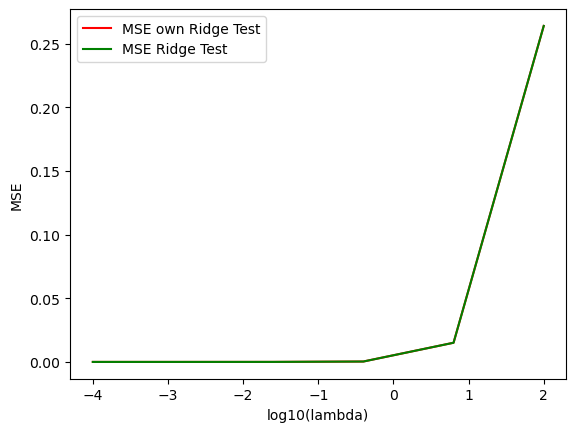

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

n = 100
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

Maxpolydegree = 20
X = np.zeros((n,Maxpolydegree))
#We include explicitely the intercept column
for degree in range(Maxpolydegree):
    X[:,degree] = x**degree
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

p = Maxpolydegree
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 6
MSEOwnRidgePredict = np.zeros(nlambdas)
MSERidgePredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    OwnRidgeTheta = np.linalg.pinv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # Note: we include the intercept column and no scaling
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ytildeOwnRidge = X_train @ OwnRidgeTheta
    ypredictOwnRidge = X_test @ OwnRidgeTheta
    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)
    MSEOwnRidgePredict[i] = MSE(y_test,ypredictOwnRidge)
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    print("Theta values for own Ridge implementation")
    print(OwnRidgeTheta)
    print("Theta values for Scikit-Learn Ridge implementation")
    print(RegRidge.coef_)
    print("MSE values for own Ridge implementation")
    print(MSEOwnRidgePredict[i])
    print("MSE values for Scikit-Learn Ridge implementation")
    print(MSERidgePredict[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEOwnRidgePredict, 'r', label = 'MSE own Ridge Test')
plt.plot(np.log10(lambdas), MSERidgePredict, 'g', label = 'MSE Ridge Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

The results here agree when we force **Scikit-Learn**'s Ridge function to include the first column in our design matrix.
We see that the results agree very well. Here we have thus explicitely included the intercept column in the design matrix.
What happens if we do not include the intercept in our fit? We will discuss this in more detail next week.

## Basic math of the SVD

From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only if it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled.

## The SVD, a Fantastic Algorithm

However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $m\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 

The SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=p$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Codes for the SVD

In [2]:
import numpy as np
# SVD inversion
def SVD(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(S)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT


X = np.array([ [1.0,-1.0], [1.0,-1.0]])
#X = np.array([[1, 2], [3, 4], [5, 6]])

print(X)
C = SVD(X)
# Print the difference between the original matrix and the SVD one
print(C-X)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.

## Note about SVD Calculations

The $U$, $S$, and $V$ matrices returned from the **svd()** function
cannot be multiplied directly.

As you can see from the code, the $S$ vector must be converted into a
diagonal matrix. This may cause a problem as the size of the matrices
do not fit the rules of matrix multiplication, where the number of
columns in a matrix must match the number of rows in the subsequent
matrix.

If you wish to include the zero singular values, you will need to
resize the matrices and set up a diagonal matrix as done in the above
example

## Mathematics of the SVD and implications

Let us take a closer look at the mathematics of the SVD and the various implications for machine learning studies.

Our starting point is our design matrix $\boldsymbol{X}$ of dimension $n\times p$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix}.
$$

We can SVD decompose our matrix as

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

where $\boldsymbol{U}$ is an orthogonal matrix of dimension $n\times n$, meaning that $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}_n$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $n \times n$.

Similarly, $\boldsymbol{V}$ is an orthogonal matrix of dimension $p\times p$, meaning that $\boldsymbol{V}\boldsymbol{V}^T=\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}_p$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $p \times p$.

Finally $\boldsymbol{\Sigma}$ contains the singular values $\sigma_i$. This matrix has dimension $n\times p$ and the singular values $\sigma_i$ are all positive. The non-zero values are ordered in descending order, that is

$$
\sigma_0 > \sigma_1 > \sigma_2 > \dots > \sigma_{p-1} > 0.
$$

All values beyond $p-1$ are all zero.

## Example Matrix

As an example, consider the following $3\times 2$ example for the matrix $\boldsymbol{\Sigma}$

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
0 & 0 \\
\end{bmatrix}
$$

The singular values are $\sigma_0=2$ and $\sigma_1=1$. It is common to rewrite the matrix $\boldsymbol{\Sigma}$ as

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
\boldsymbol{\tilde{\Sigma}}\\
\boldsymbol{0}\\
\end{bmatrix},
$$

where

$$
\boldsymbol{\tilde{\Sigma}}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
\end{bmatrix},
$$

contains only the singular values.   Note also (and we will use this below) that

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=
\begin{bmatrix}
4& 0 \\
0 & 1 \\
\end{bmatrix},
$$

which is a $2\times 2 $ matrix while

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T=
\begin{bmatrix}
4& 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix},
$$

is a $3\times 3 $ matrix. The last row and column of this last matrix
contain only zeros. This will have important consequences for our SVD
decomposition of the design matrix.

## Setting up the Matrix to be inverted

The matrix that may cause problems for us is $\boldsymbol{X}^T\boldsymbol{X}$. Using the SVD we can rewrite this matrix as

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

and using the orthogonality of the matrix $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

We define $\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=\tilde{\boldsymbol{\Sigma}}^2$ which is  a diagonal matrix containing only the singular values squared. It has dimensionality $p \times p$.

We can now insert the result for the matrix $\boldsymbol{X}^T\boldsymbol{X}$ into our equation for ordinary least squares where

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

and using our SVD decomposition of $\boldsymbol{X}$ we have

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\left(\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^{2}(\boldsymbol{V}^T\right)^{-1}\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{y},
$$

which gives us, using the orthogonality of the matrix $\boldsymbol{V}$,

$$
\tilde{y}_{\mathrm{OLS}}=\sum_{i=0}^{p-1}\boldsymbol{u}_i\boldsymbol{u}^T_i\boldsymbol{y},
$$

which is not the same as $\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}$, which due to the orthogonality of $\boldsymbol{U}$ would have given us that the model equals the output.

It means that the ordinary least square model (with the optimal
parameters) $\boldsymbol{\tilde{y}}$, corresponds to an orthogonal
transformation of the output (or target) vector $\boldsymbol{y}$ by the
vectors of the matrix $\boldsymbol{U}$. **Note that the summation ends at**
$p-1$, that is $\boldsymbol{\tilde{y}}\ne \boldsymbol{y}$. We can thus not use the
orthogonality relation for the matrix $\boldsymbol{U}$.

## Further properties (important for our analyses later)

Let us study again $\boldsymbol{X}^T\boldsymbol{X}$ in terms of our SVD,

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

If we now multiply from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}.
$$

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$ are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

Similarly, if we use the SVD decomposition for the matrix $\boldsymbol{X}\boldsymbol{X}^T$, we have

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

If we now multiply from the right with $\boldsymbol{U}$ (using the orthogonality of $\boldsymbol{U}$) we get

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{U}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T.
$$

This means the vectors $\boldsymbol{u}_i$ of the orthogonal matrix $\boldsymbol{U}$ are the eigenvectors of the matrix $\boldsymbol{X}\boldsymbol{X}^T$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{u}_i=\boldsymbol{u}_i\sigma_i^2.
$$

**Important note**: we have defined our design matrix $\boldsymbol{X}$ to be an
$n\times p$ matrix. In most supervised learning cases we have that $n
\ge p$, and quite often we have $n >> p$. For linear algebra based methods like ordinary least squares or Ridge regression, this leads to a matrix $\boldsymbol{X}^T\boldsymbol{X}$ which is small and thereby easier to handle from a computational point of view (in terms of number of floating point operations).

In our lectures, the number of columns will
always refer to the number of features in our data set, while the
number of rows represents the number of data inputs. Note that in
other texts you may find the opposite notation. This has consequences
for the definition of for example the covariance matrix and its relation to the SVD.

## Back to Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\theta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\theta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\theta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\theta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\theta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\theta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\theta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

Ridge regression, as discussed above,  is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\theta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\theta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\theta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\theta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{n-1}\boldsymbol{u}_i\boldsymbol{u}_i^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\theta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\theta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\theta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})\right\}+\lambda\vert\vert\boldsymbol{\theta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\theta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicty)

$$
\frac{d \vert \theta\vert}{d \theta}=\mathrm{sgn}(\theta)=\left\{\begin{array}{cc} 1 & \theta > 0 \\-1 & \theta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\theta})}{\partial \boldsymbol{\theta}}=-\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta})+\lambda sgn(\boldsymbol{\theta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\theta}+\frac{n}{2}\lambda sgn(\boldsymbol{\theta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

We can redefine $\lambda$ to absorb the constant $n/2$ and we rewrite the last equation as

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\theta}+\lambda sgn(\boldsymbol{\theta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in either Ridge regression or ordinary least squares. This equation can however be solved by using standard convex optimization algorithms.We will discuss how to code the above methods using gardient descent methods.

## Material for lab sessions  sessions Tuesday and Wednesday

The material here contains a summary of the lecture on Monday and discussion of SVD, Ridge and Lasso regression with examples

## Linear Regression and  the SVD

We used the SVD to analyse the matrix to invert in ordinary lineat regression

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Since the matrices here have dimension $p\times p$, with $p$ corresponding to the singular values, we defined last week the matrix

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma} = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\end{bmatrix},
$$

where the tilde-matrix $\tilde{\boldsymbol{\Sigma}}$ is a matrix of dimension $p\times p$ containing only the singular values $\sigma_i$, that is

$$
\tilde{\boldsymbol{\Sigma}}=\begin{bmatrix} \sigma_0 & 0 & 0 & \dots & 0 & 0 \\
                                    0 & \sigma_1 & 0 & \dots & 0 & 0 \\
				    0 & 0 & \sigma_2 & \dots & 0 & 0 \\
				    0 & 0 & 0 & \dots & \sigma_{p-2} & 0 \\
				    0 & 0 & 0 & \dots & 0 & \sigma_{p-1} \\
\end{bmatrix},
$$

meaning we can write

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2\boldsymbol{V}^T.
$$

Multiplying from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2.
$$

## What does it mean?

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$
are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ with eigenvalues
given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

In other words, each non-zero singular value of $\boldsymbol{X}$ is a positive
square root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$.  It means also that
the columns of $\boldsymbol{V}$ are the eigenvectors of
$\boldsymbol{X}^T\boldsymbol{X}$. Since we have ordered the singular values of
$\boldsymbol{X}$ in a descending order, it means that the column vectors
$\boldsymbol{v}_i$ are hierarchically ordered by how much correlation they
encode from the columns of $\boldsymbol{X}$. 

Note that these are also the eigenvectors and eigenvalues of the
Hessian matrix.

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

## From OLS to Ridge and Lasso

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. We do not include such a constraints in the discussions here.

By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number.

## Note on Scikit-Learn

Note well that a library like **Scikit-Learn** does not include the $1/n$ factor in the expression for the mean-squared error. If you include it, the optimal parameter $\beta$ becomes

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+n\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In our codes where we compare our own codes with **Scikit-Learn**, we do thus not include the $1/n$ factor in the cost function.

## Comparison with OLS
When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

## SVD analysis

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{n-1}\boldsymbol{u}_i\boldsymbol{u}_i^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicity)

$$
\frac{d \vert \beta\vert}{d \beta}=\mathrm{sgn}(\beta)=\left\{\begin{array}{cc} 1 & \beta > 0 \\-1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in Ridge regression or ordinary least squares. We have absorbed the factor $2/n$ in a redefinition of the parameter $\lambda$. We will solve this type of problems using libraries like **scikit-learn** and using our own gradient descent code in project 1.

## Simple example to illustrate Ordinary Least Squares, Ridge and Lasso Regression

Let us assume that our design matrix is given by unit (identity) matrix, that is a square diagonal matrix with ones only along the
diagonal. In this case we have an equal number of rows and columns $n=p$.

Our model approximation is just $\tilde{\boldsymbol{y}}=\boldsymbol{\beta}$ and the mean squared error and thereby the cost function for ordinary least sqquares (OLS) is then (we drop the term $1/n$)

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{OLS}} = y_i.
$$

## Ridge Regression

For Ridge regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\beta_i^2,
$$

and minimizing we have that

$$
\hat{\beta}_i^{\mathrm{Ridge}} = \frac{y_i}{1+\lambda}.
$$

## Lasso Regression

For Lasso regression our cost function is

$$
C(\boldsymbol{\beta})=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\vert\beta_i\vert=\sum_{i=0}^{p-1}(y_i-\beta_i)^2+\lambda\sum_{i=0}^{p-1}\sqrt{\beta_i^2},
$$

and minimizing we have that

$$
-2\sum_{i=0}^{p-1}(y_i-\beta_i)+\lambda \sum_{i=0}^{p-1}\frac{(\beta_i)}{\vert\beta_i\vert}=0,
$$

which leads to

$$
\hat{\boldsymbol{\beta}}_i^{\mathrm{Lasso}} = \left\{\begin{array}{ccc}y_i-\frac{\lambda}{2} &\mathrm{if} & y_i> \frac{\lambda}{2}\\
                                                          y_i+\frac{\lambda}{2} &\mathrm{if} & y_i< -\frac{\lambda}{2}\\
							  0 &\mathrm{if} & \vert y_i\vert\le  \frac{\lambda}{2}\end{array}\right.\\.
$$

Plotting these results shows clearly that Lasso regression suppresses (sets to zero) values of $\beta_i$ for specific values of $\lambda$. Ridge regression reduces on the other hand the values of $\beta_i$ as function of $\lambda$.

## Yet another Example

Let us assume we have a data set with outputs/targets given by the vector

$$
\boldsymbol{y}=\begin{bmatrix}4 \\ 2 \\3\end{bmatrix},
$$

and our inputs as a $3\times 2$ design matrix

$$
\boldsymbol{X}=\begin{bmatrix}2 & 0\\ 0 & 1 \\ 0 & 0\end{bmatrix},
$$

meaning that we have two features and two unknown parameters $\beta_0$ and $\beta_1$ to be determined either by ordinary least squares, Ridge or Lasso regression.

## The OLS case

For ordinary least squares (OLS) we know that the optimal solution is

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\left( \boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}=\begin{bmatrix}2 \\ 2\end{bmatrix},
$$

The code which implements this simpler case is presented after the discussion of Ridge and Lasso.

## The Ridge case

For Ridge regression we have

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\left( \boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

Inserting the above values we obtain that

$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}=\begin{bmatrix}\frac{8}{4+\lambda} \\ \frac{2}{1+\lambda}\end{bmatrix},
$$

There is normally a constraint on the value of $\vert\vert \boldsymbol{\beta}\vert\vert_2$ via the parameter $\lambda$.
Let us for simplicity assume that $\beta_0^2+\beta_1^2=1$ as constraint. This will allow us to find an expression for the optimal values of $\beta$ and $\lambda$.

To see this, let us write the cost function for Ridge regression.

## Writing the Cost Function

We define the MSE without the $1/n$ factor and have then, using that

$$
\boldsymbol{X}\boldsymbol{\beta}=\begin{bmatrix} 2\beta_0 \\ \beta_1 \\0 \end{bmatrix},
$$

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\beta_0^2+\beta_1^2),
$$

and taking the derivative with respect to $\beta_0$ we get

$$
\beta_0=\frac{8}{4+\lambda},
$$

and for $\beta_1$ we obtain

$$
\beta_1=\frac{2}{1+\lambda},
$$

Using the constraint for $\beta_0^2+\beta_1^2=1$ we can constrain $\lambda$ by solving

$$
\left(\frac{8}{4+\lambda}\right)^2+\left(\frac{2}{1+\lambda}\right)^2=1,
$$

which gives $\lambda=4.571$ and $\beta_0=0.933$ and $\beta_1=0.359$.

## Lasso case

For Lasso we need now, keeping a  constraint on $\vert\beta_0\vert+\vert\beta_1\vert=1$,  to take the derivative of the absolute values of $\beta_0$
and $\beta_1$. This gives us the following derivatives of the cost function

$$
C(\boldsymbol{\beta})=(4-2\beta_0)^2+(2-\beta_1)^2+\lambda(\vert\beta_0\vert+\vert\beta_1\vert),
$$

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_0}=-4(4-2\beta_0)+\lambda\mathrm{sgn}(\beta_0)=0,
$$

and

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_1}=-2(2-\beta_1)+\lambda\mathrm{sgn}(\beta_1)=0.
$$

We have now four cases to solve besides the trivial cases $\beta_0$ and/or $\beta_1$ are zero, namely
1. $\beta_0 > 0$ and $\beta_1 > 0$,

2. $\beta_0 > 0$ and $\beta_1 < 0$,

3. $\beta_0 < 0$ and $\beta_1 > 0$,

4. $\beta_0 < 0$ and $\beta_1 < 0$.

## The first Case

If we consider the first case, we have then

$$
-4(4-2\beta_0)+\lambda=0,
$$

and

$$
-2(2-\beta_1)+\lambda=0.
$$

which yields

$$
\beta_0=\frac{16+\lambda}{8},
$$

and

$$
\beta_1=\frac{4+\lambda}{2}.
$$

Using the constraint on $\beta_0$ and $\beta_1$ we can then find the optimal value of $\lambda$ for the different cases. We leave this as an exercise to you.

## Simple code for solving the above problem

Here we set up the OLS, Ridge and Lasso functionality in order to study the above example. Note that here we have opted for a set of values of $\lambda$, meaning that we need to perform a search in order to find the optimal values.

First we study and compare the OLS and Ridge results.  The next code compares all three methods.

[2. 2.]
Training MSE for OLS
3.0


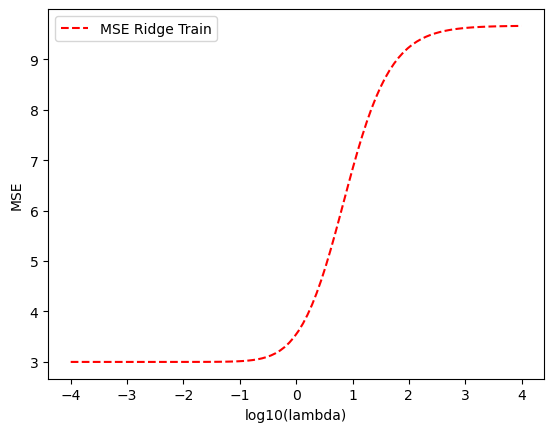

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
#    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSEPredict[i] = MSE(y,ypredictRidge)
#    print(MSEPredict[i])
    # Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

We see here that we reach a plateau. What is actually happening?

## With Lasso Regression

[2. 2.]
Training MSE for OLS
3.0
[1.99995    1.99980002]
[1.999925 1.9997  ]
[1.99993978 1.99975913]
[1.99990966 1.99963865]
[1.99992746 1.99970988]
[1.99989119 1.99956475]
[1.99991263 1.99965056]
[1.99986894 1.99947574]
[1.99989476 1.99957911]
[1.99984213 1.99936853]
[1.99987324 1.99949306]
[1.99980985 1.99923939]
[1.99984732 1.99938942]
[1.99977096 1.99908384]
[1.9998161  1.99926459]
[1.99972412 1.99889649]
[1.99977849 1.99911427]
[1.9996677  1.99867081]
[1.9997332  1.99893323]
[1.99959975 1.99839899]
[1.99967865 1.99871521]
[1.99951789 1.99807158]
[1.99961294 1.99845267]
[1.9994193  1.99767721]
[1.99953381 1.99813653]
[1.99930055 1.99720219]
[1.9994385  1.99775587]
[1.99915751 1.99663003]
[1.9993237  1.99729756]
[1.99898521 1.99594086]
[1.99918546 1.9967458 ]
[1.99877769 1.99511075]
[1.99901896 1.99608161]
[1.99852772 1.99411088]
[1.99881845 1.99528218]
[1.99822663 1.99290653]
[1.998577  1.9943201]
[1.99786397 1.99145589]
[1.99828624 1.99316252]
[1.99742715 1.98970859]
[1.99793613 1

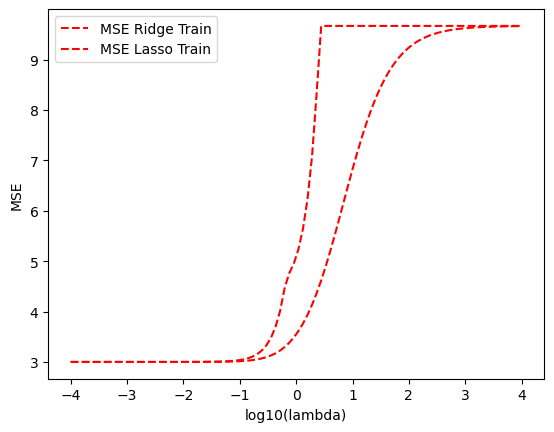

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
    print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X,y)
    ypredictLasso = RegLasso.predict(X)
    print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Another Example, now with a polynomial fit

[ 2.03099776 -0.17917768  5.18029127]
Training MSE for OLS
0.009163470508352218
Test MSE OLS
0.008675369724975977


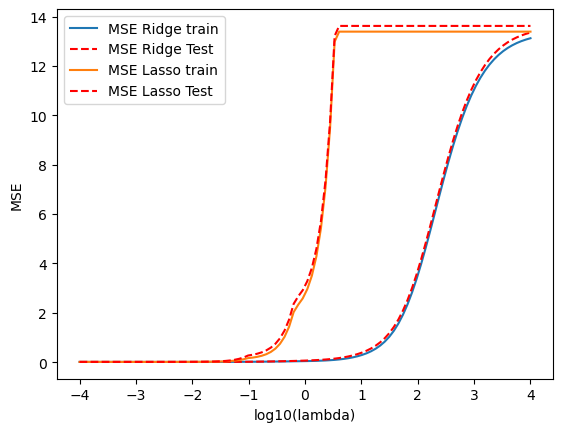

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)

# number of features p (here degree of polynomial
p = 3
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),p))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x*x
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
# and then make the prediction
ytildeOLS = X_train @ OLSbeta
print("Training MSE for OLS")
print(MSE(y_train,ytildeOLS))
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))

# Repeat now for Lasso and Ridge regression and various values of the regularization parameter
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
MSELassoTrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # include lasso using Scikit-Learn
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    ytildeLasso = RegLasso.predict(X_train)
    ypredictLasso = RegLasso.predict(X_test)
    MSEPredict[i] = MSE(y_test,ypredictRidge)
    MSETrain[i] = MSE(y_train,ytildeRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    MSELassoTrain[i] = MSE(y_train,ytildeLasso)

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoTrain, label = 'MSE Lasso train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()